In [2]:

from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

breast.target_names



array(['malignant', 'benign'], dtype='<U9')

In [3]:
import pandas as pd

df = pd.DataFrame( data    = breast['data'],         
                      columns =  breast['feature_names']) 

df['result']=breast['target']

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


Las variables son numéricas pero de una escala muy diferente por lo que para determinadas técnicas (como las basadas en distancia, como el k-NN, y en regresión de variables, como las redes neuronales) suele ser conveniente re-escalar los datos 

In [4]:
df['result'].value_counts()/df['result'].count()*100

1    62.741652
0    37.258348
Name: result, dtype: float64

La clase 'maligna' es más frecuente que la benigna (aprox. 2/3 frente a 1/3)

## k-NN con distintos valores de k con validación cruzada en k partes estratificadas 

OJO: El valor de k (número de vecinos) y el de k de las k-partes o k-folds no están relacionados. Son totalmente independientes. El valor de k que nos interesa "optimizar" es el de los vecinos.

In [6]:
# Como la proporción de clases a predecir está desbalanceada 
# usamos k-fold estratificado que mantiene la proporción en cada "fold"
from sklearn.model_selection import StratifiedKFold
from sklearn import neighbors

import numpy as np
import matplotlib.pyplot as plt

# Creamos n_splits particiones, barajando los datos (shuffle) y "fijando" la aleatoriedad 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


train_k_results_mean=[]
train_k_results_std=[]
test_k_results_mean=[]
test_k_results_std=[]

rango_k=range(1,15)

k_values=rango_k

for k in rango_k: 
    # Creamos el clasificador de k-NN
    #   Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
    #   El parámetro p es el orden de la métrica de Minkowski (1 Manhattan, 2 Euclídea)
    clf = neighbors.KNeighborsClassifier(k, weights='distance', p=2)
    
    train_results=[]
    test_results=[]
    
    for train_index, test_index in skf.split(breast.data, breast.target):
        
        X_train, X_test = breast.data[train_index], breast.data[test_index]
        y_train, y_test = breast.target[train_index], breast.target[test_index]
        
        clf.fit(X_train, y_train)
        
        train_results.append(clf.score(X_train, y_train))
        test_results.append(clf.score(X_test, y_test))
    
    
    train_k_results_mean.append(np.mean(train_results))
    train_k_results_std.append(np.std(train_results))
    test_k_results_mean.append(np.mean(test_results))
    test_k_results_std.append(np.std(test_results))
    
     

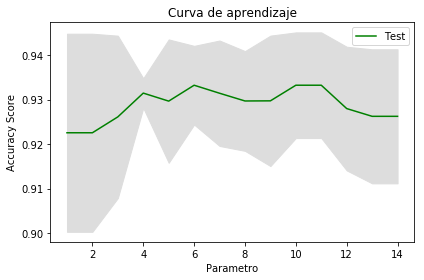

In [7]:
     
    
# Dibujamos la línea con la accuracy (exactitud) en el test
# No dibujamos la de entrenamiento porque en el k-NN está siempre en 100
#plt.plot(k_values, train_k_results_mean, color="r",  label="Training")
plt.plot(k_values, test_k_results_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(test_k_results_mean)-np.array(test_k_results_std)
upper_limit=np.array(test_k_results_mean)+np.array(test_k_results_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Con k=4 vecinos tenemos una accuracy muy similar a las óptimas (k=6, 10, 11), pero con menos desviación típica entre los folds, por lo que varía menos. Además, es un modelo más sencillo al tener un k menor.





## Repetición del proceso: Datos escalados



In [8]:
# Normalizamos los datos con StardardScaler. Para cada variable se resta su media y se divide entre su desviación típica.
# Otra opción sería utilizar una transformación de rango donde 0 sea el valor mínimo de la variable y 1 el máximo. 
# Esta transformación se puede hacer con MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(breast.data)
breast_scaled=scaler.transform(breast.data)

In [9]:
# Creamos n_splits particiones, barajando los datos (shuffle) y "fijando" la aleatoriedad 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


train_k_results_mean=[]
train_k_results_std=[]
test_k_results_mean=[]
test_k_results_std=[]

rango_k=range(1,15)

k_values=rango_k

for k in rango_k: 
    # Creamos el clasificador de k-NN
    #   Podemos fijar los pesos como 'uniform' o inv. proporcionales a la distancia 'distance'
    #   El parámetro p es el orden de la métrica de Minkowski (1 Manhattan, 2 Euclídea)
    clf = neighbors.KNeighborsClassifier(k, weights='distance', p=2)
    
    train_results=[]
    test_results=[]
    
    for train_index, test_index in skf.split(breast_scaled, breast.target):
        
        X_train, X_test = breast_scaled[train_index], breast_scaled[test_index]
        y_train, y_test = breast.target[train_index], breast.target[test_index]
        
        clf.fit(X_train, y_train)
        
        train_results.append(clf.score(X_train, y_train))
        test_results.append(clf.score(X_test, y_test))
    
    
    train_k_results_mean.append(np.mean(train_results))
    train_k_results_std.append(np.std(train_results))
    test_k_results_mean.append(np.mean(test_results))
    test_k_results_std.append(np.std(test_results))
    
          
    


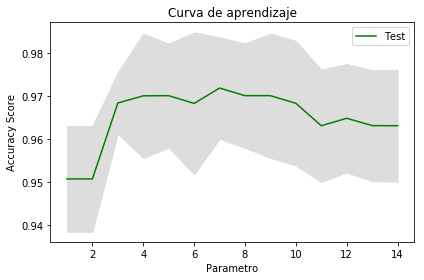

In [10]:
# Dibujamos la línea de la exactitud media en las partes de test
#plt.plot(k_values, train_k_results_mean, color="r",  label="Training")
plt.plot(k_values, test_k_results_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit=np.array(test_k_results_mean)-np.array(test_k_results_std)
upper_limit=np.array(test_k_results_mean)+np.array(test_k_results_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En este caso obtenemos valores muy superiores a los que obtenemos con las variables sin normalizar. Y con valores de k entre 3 y 10 se obtienen valores en torno a 0.97. Como en el caso anterior optamos por k=3 que tiene menos desviación típica.

Sin emabrgo, en este caso, la tasa de aciertos (o exactitud) ha subido al 0.97, mientras que antes estaba en torno a 0.93.

SEGUIR OPTIMIZANDO EL CLASIFICADOR: Una opción a probar es reducir la dimensionalidad del conjunto de datos, es decir, el número de variables, ya que es posible que contenga variables superfluas.

# Analizamos los resultados del mejor k-NN con otras métricas

In [11]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Importamos también un asistente para hacer la validación cruzada más sencilla
from sklearn.model_selection import cross_validate

In [12]:
# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase 
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra
# Esto lo hacemos porque la muestra está desbalanceada (diferente número de instancias)
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']


# Los mejores resultados se obtenían para k=3 sobre los datos re-escalados
clf = neighbors.KNeighborsClassifier(3, weights='distance', p=2)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Este asistente simplifica mucho el proceso
# Por defecto usa "estratificación", que es la opción que tomamos antes
scores = cross_validate(clf, breast_scaled, breast.target,
                         scoring=scoring_metrics, cv=5,
                         return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test
scores

{'fit_time': array([0.        , 0.        , 0.        , 0.        , 0.01562142]),
 'score_time': array([0.01562142, 0.01564455, 0.01562095, 0.        , 0.        ]),
 'test_precision_weighted': array([0.97394424, 0.95646502, 0.98278579, 0.95104011, 0.92920354]),
 'test_recall_weighted': array([0.97391304, 0.95652174, 0.98230088, 0.94690265, 0.92920354]),
 'test_f1_weighted': array([0.97384955, 0.95641591, 0.98220795, 0.94593675, 0.92920354])}

In [14]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.9586877399166636
Exhaustividad ponderada media:  0.9577683724509427
F1 ponderado media:  0.9575227389525504


## Desglose de las métricas para cada clase

NOTA: Estas métricas que vamos a calcular no son obtenidas por un único clasificador, sino por una agregación de los k clasificadores estimados en el k-fold


In [15]:
# Vamos a observar ahora las predicciones agregadas y pintar las métricas para cada clase y la matriz de confusión
# Para ello usamos un asistente similar al anterior pero que devuelve las predicciones generadas
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(clf, breast_scaled, breast.target, cv=5)

# En llugar de elegir las métricas, lo que hacemos es usar una
# utilidad de sklearn que nos da las que conocemos
from sklearn.metrics import classification_report


cr=classification_report(breast.target,predictions, target_names=breast.target_names)

print(cr)





              precision    recall  f1-score   support

   malignant       0.97      0.92      0.94       212
      benign       0.95      0.98      0.97       357

   micro avg       0.96      0.96      0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569



In [16]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[195  17]
 [  7 350]]


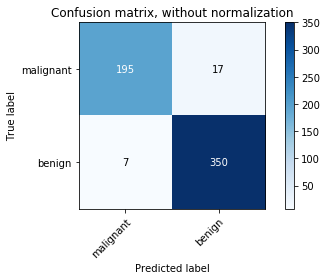

In [19]:
plot_confusion_matrix(breast.target,predictions, normalize=False, classes=breast.target_names)